## Outlier Engineering

We will perform **capping with the quantiles** using the Boston House Dataset!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  # for Q-Q plots
from sklearn.datasets import load_boston
from feature_engine.outliers import Winsorizer

**Load the the Boston House price data from sklearn! Create a dataframe with the independent variables!**

In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
    columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]
boston['MEDV'] = boston_dataset.target  # add the target
boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


**Function to create histogram, Q-Q plot and boxplot!**

In [3]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))  # define figure size
    plt.subplot(1, 3, 1)  # histogram
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    plt.subplot(1, 3, 2)  # Q-Q plot
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    plt.subplot(1, 3, 3)  # boxplot
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

**Find outliers in RM !**

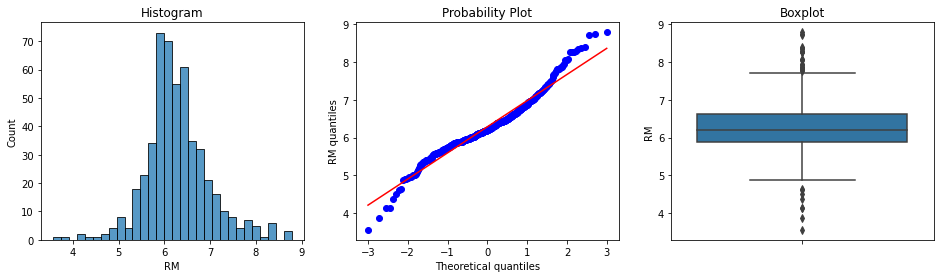

In [4]:
diagnostic_plots(boston, 'RM')

**Visualise outliers in LSTAT !**

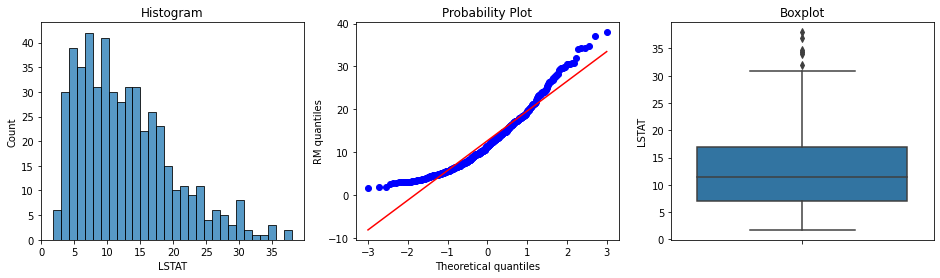

In [5]:
diagnostic_plots(boston, 'LSTAT')

**Outliers in CRIM !**

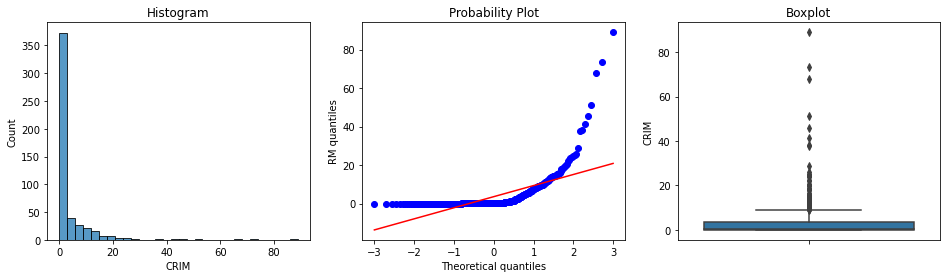

In [6]:
diagnostic_plots(boston, 'CRIM')

**There are outliers in all of the above variables**. RM shows outliers in **both tails**, whereas LSTAT and CRIM only on **the right tail.** To find the outliers, re-utilise the function!

**Find the quantile boundaries!**

In [7]:
def find_boundaries(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary

**Find limits for RM !**

In [8]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM')
RM_upper_limit, RM_lower_limit

(7.5875, 5.314)

**Limits for LSTAT !**

In [9]:
LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(boston, 'LSTAT')
LSTAT_upper_limit, LSTAT_lower_limit

(26.8075, 3.7075)

**Limits for CRIM !**

In [10]:
CRIM_upper_limit, CRIM_lower_limit = find_boundaries(boston, 'CRIM')
CRIM_upper_limit, CRIM_lower_limit

(15.78915, 0.027909999999999997)

**Replace the outliers by the maximum and minimum limit !**

In [11]:
boston['RM']= np.where(boston['RM'] > RM_upper_limit, RM_upper_limit,
    np.where(boston['RM'] < RM_lower_limit, RM_lower_limit, boston['RM']))

**Replace the outliers by the maximum and minimum limit !**

In [12]:
boston['LSTAT']= np.where(boston['LSTAT'] > LSTAT_upper_limit, LSTAT_upper_limit,
    np.where(boston['LSTAT'] < LSTAT_lower_limit, LSTAT_lower_limit, boston['LSTAT']))

**Replace the outliers by the maximum and minimum limit!**

In [13]:
boston['CRIM']= np.where(boston['CRIM'] > CRIM_upper_limit, CRIM_upper_limit,
    np.where(boston['CRIM'] < CRIM_lower_limit, CRIM_lower_limit, boston['CRIM']))

**Explore outliers in the trimmed dataset for RM we see much less outliers as in the original dataset!**

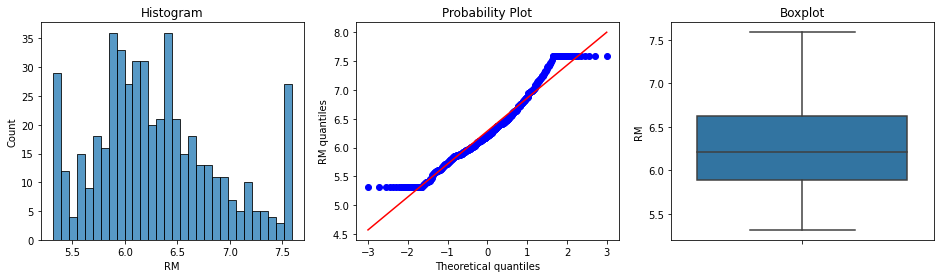

In [14]:
diagnostic_plots(boston, 'RM')

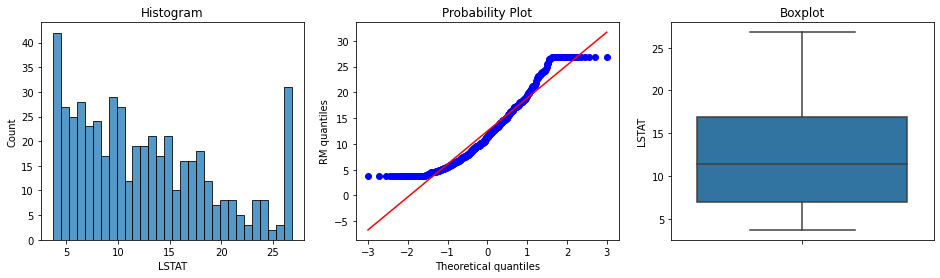

In [15]:
diagnostic_plots(boston, 'LSTAT')

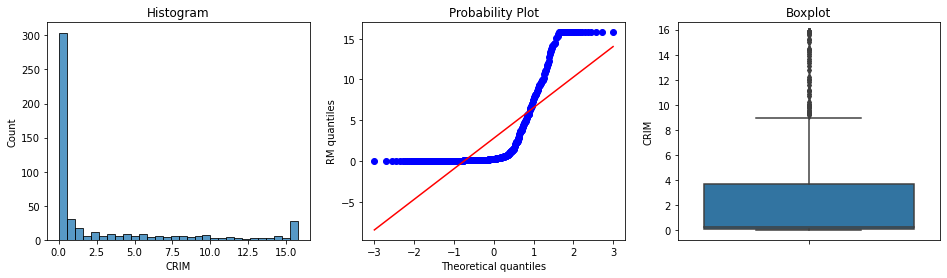

In [16]:
diagnostic_plots(boston, 'CRIM')

We can see that the outliers are gone, but the variable distribution was distorted quite a bit.

## Censoring with feature-engine

**Load the the Boston House price data from sklearn! Create a dataframe with the independent variables!**

In [17]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
    columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]
boston['MEDV'] = boston_dataset.target  # add the target
boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


**Create the capper!**

In [18]:
windsoriser = Winsorizer(capping_method='quantiles', # choose from iqr, gaussian or quantiles
                          tail='both', # cap left, right or both tails 
                          fold=0.05,
                          variables=['RM', 'LSTAT', 'CRIM'])
windsoriser.fit(boston)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['RM', 'LSTAT', 'CRIM'])

In [19]:
boston_t = windsoriser.transform(boston)

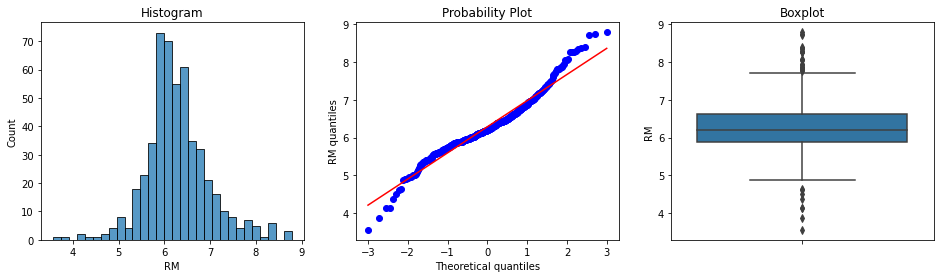

In [20]:
diagnostic_plots(boston, 'RM')

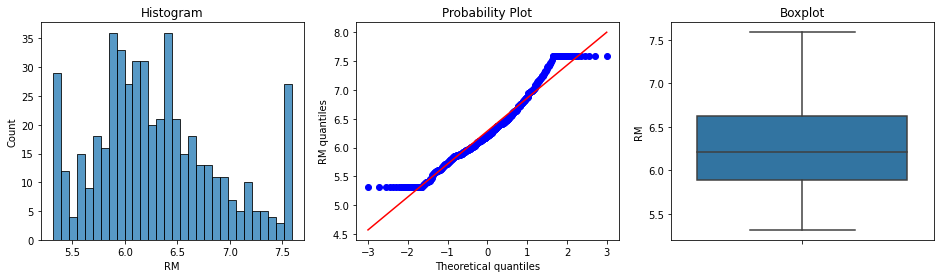

In [21]:
diagnostic_plots(boston_t, 'RM')

**Inspect the minimum caps for each variable!**

In [22]:
windsoriser.left_tail_caps_

{'RM': 5.314, 'LSTAT': 3.7075, 'CRIM': 0.027909999999999997}

**Inspect the maximum caps for each variable!**

In [23]:
windsoriser.right_tail_caps_

{'RM': 7.5875, 'LSTAT': 26.8075, 'CRIM': 15.78915}